# Guided Project: Analyzing NYC High School Data

Analysis of data on SAT scores of NYC high schools, which was cleaned and combined from various sources in a previous notebook.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from pathlib import Path

In [2]:
data_path = Path.home() / "datasets" / "tabular_practice" / "schools"

combined = pd.read_csv(data_path / "combined_cleaned_withmissing.csv")
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DBN                 411 non-null    object 
 1   sat_num_takers      411 non-null    float64
 2   sat_crit_reading    411 non-null    float64
 3   sat_math            411 non-null    float64
 4   sat_writing         411 non-null    float64
 5   sat_score           411 non-null    float64
 6   class_size          411 non-null    float64
 7   asian_per           411 non-null    float64
 8   black_per           411 non-null    float64
 9   hispanic_per        411 non-null    float64
 10  white_per           411 non-null    float64
 11  male_per            411 non-null    float64
 12  female_per          411 non-null    float64
 13  frl_percent         411 non-null    float64
 14  ell_percent         411 non-null    float64
 15  sped_percent        411 non-null    float64
 16  total_en

In [3]:
combined["school_dist"] = combined["DBN"].str[0:2].astype(int)

First, we look at correlations between "sat_score" and the columns coming from "survey".

In [4]:
def plot_correlations_with_sat_score(names):
    correlations = combined[names + ["sat_score"]].corr()["sat_score"][:-1].sort_values(ascending=False)
    correlations.plot(kind="barh")

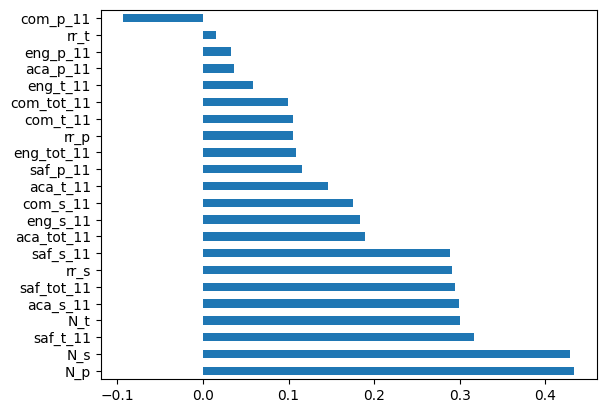

In [5]:
survey_fields = [
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

plot_correlations_with_sat_score(survey_fields)

Columns with strongest positive correlation to "sat_score":

* "N_p": Number of parent respondents
* "N_s": Number of student respondents
* "saf_t_11": Safety and Respect score based on teacher responses
* "aca_s_11": Academic expectations score based on student responses
* "N_t": Number of teacher respondents

A high number of parents and students responding to ther survey is probably indicative of academic interest. Also, this number scales with the total number of students, which is also positively (but more weakly) correlated with "sat_score".

<Axes: xlabel='sat_score', ylabel='saf_s_11'>

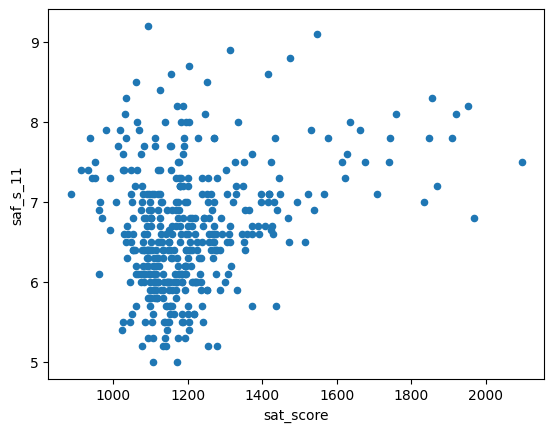

In [6]:
combined.plot.scatter(x="sat_score", y="saf_s_11")

In [7]:
combined.groupby("school_dist")[["saf_s_11", "saf_t_11"]].mean()

,saf_s_11,saf_t_11
school_dist,,
1,7.061683,7.511111
2,7.050951,7.408621
3,6.700000,6.823077
4,6.728571,7.514286
5,6.200000,6.800000
6,6.877778,7.411111
7,6.853333,7.026667
8,6.550000,7.000000
9,6.623810,6.933333


In [8]:
borough = combined["DBN"].str[2]
combined.groupby(borough)[["saf_s_11", "saf_t_11"]].mean()

,saf_s_11,saf_t_11
DBN,,
K,6.501272,6.980328
M,6.899146,7.300000
Q,6.659091,7.343939
R,6.663636,7.345455
X,6.587850,6.999065


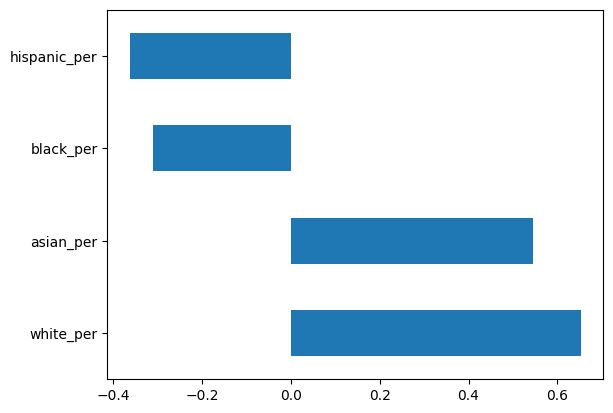

In [9]:
names = ["white_per", "asian_per", "hispanic_per", "black_per"]
plot_correlations_with_sat_score(names)

<Axes: xlabel='sat_score', ylabel='hispanic_per'>

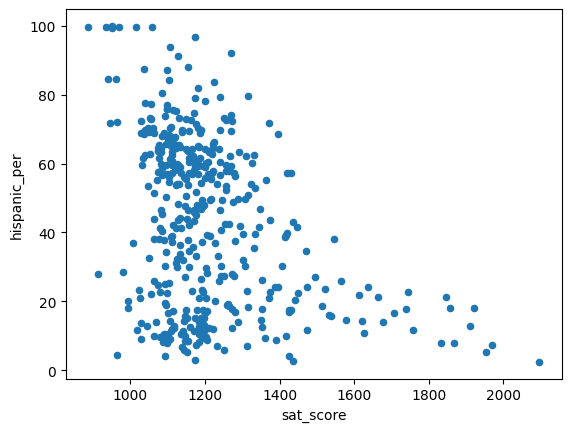

In [10]:
combined.plot.scatter(x="sat_score", y="hispanic_per")

In [11]:
hispanic_gt_95 = combined.query("hispanic_per > 95").sort_values("sat_score")

In [12]:
hs_df = pd.read_csv(data_path / "hs_directory.csv").rename({"dbn": "DBN"}, axis=1)
hs_df.head()

,DBN,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...",3.0,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...",9.0,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...


In [13]:
hispanic_gt_95 = hispanic_gt_95.merge(hs_df[["DBN", "school_name"]], how="left", on="DBN")
hispanic_gt_95

,DBN,sat_num_takers,sat_crit_reading,sat_math,sat_writing,sat_score,class_size,asian_per,black_per,hispanic_per,...,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,school_dist,school_name
0,19K583,29.0,279.0,322.0,286.0,887.0,23.808333,0.0,0.2,99.8,...,7.1,5.9,7.0,7.4,7.0,6.5,6.8,7.1,19,Multicultural High School
1,10X342,49.0,300.0,333.0,301.0,934.0,23.723077,0.2,0.0,99.8,...,7.4,6.4,7.1,7.7,7.8,7.1,7.1,7.7,10,International School for Liberal Arts
2,09X365,54.0,315.0,339.0,297.0,951.0,23.714286,0.0,0.6,99.4,...,7.5,6.5,7.2,7.7,7.9,6.8,7.1,7.8,9,Academy for Language and Technology
3,24Q296,55.0,317.0,323.0,311.0,951.0,19.726667,0.0,0.0,100.0,...,7.3,6.1,7.0,7.6,7.5,7.0,7.4,7.6,24,Pan American International High School
4,12X388,30.0,321.0,351.0,298.0,970.0,15.361538,0.0,0.0,99.8,...,6.8,7.1,7.6,8.0,7.3,6.8,7.3,7.6,12,Pan American International High School at Monroe
5,06M552,56.0,339.0,349.0,326.0,1014.0,25.430769,0.0,0.0,99.8,...,7.7,6.2,7.0,7.7,8.5,7.0,7.5,8.1,6,Gregorio Luperon High School for Science and M...
6,02M542,66.0,336.0,378.0,344.0,1058.0,23.475000,0.2,0.0,99.8,...,7.2,6.2,6.7,7.5,7.9,7.0,7.3,8.0,2,Manhattan Bridges High School
7,06M348,70.0,380.0,395.0,399.0,1174.0,28.060000,0.0,2.3,96.7,...,7.5,6.9,7.1,8.2,8.3,7.6,7.5,8.4,6,Washington Heights Expeditionary Learning School


In [14]:
extra_info = [
    "Bilingual instruction in Spanish and English for new immigrants. Some students must leave school to support their families.",
    "The International School for Liberal Arts (ISLA) is a safe, well-run 6th−12th grade school designed to offer Spanish-speaking teens a gentle transition to English.",
    "The Academy for Language and Technology High School, housed in a middle school, IS 303, offers new immigrants a safe, orderly environment and the chance to learn computer programming and maintenance.",
    "The Pan American International High School (PAIHS) in Elmhurst is an Internationals Network public high school that serves newly arrived Latinx students and provides them with a bilingual education",
    "Pan American International High School (PAIS) at Monroe offers new immigrants—including many unaccompanied minors—the chance to learn English and complete high school.",
    "Spanish-speaking students new to this country learn about robotics and aviation. Many students with low skills need to catch up",
    "Successful Spanish bilingual instruction for new immigrants and strong STEM programs",
    "Trips, projects and in-depth studies. Some children miss many days of school",
]
hispanic_gt_95["extra_info"] = extra_info

In [15]:
hispanic_gt_95

,DBN,sat_num_takers,sat_crit_reading,sat_math,sat_writing,sat_score,class_size,asian_per,black_per,hispanic_per,...,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,school_dist,school_name,extra_info
0,19K583,29.0,279.0,322.0,286.0,887.0,23.808333,0.0,0.2,99.8,...,5.9,7.0,7.4,7.0,6.5,6.8,7.1,19,Multicultural High School,Bilingual instruction in Spanish and English f...
1,10X342,49.0,300.0,333.0,301.0,934.0,23.723077,0.2,0.0,99.8,...,6.4,7.1,7.7,7.8,7.1,7.1,7.7,10,International School for Liberal Arts,The International School for Liberal Arts (ISL...
2,09X365,54.0,315.0,339.0,297.0,951.0,23.714286,0.0,0.6,99.4,...,6.5,7.2,7.7,7.9,6.8,7.1,7.8,9,Academy for Language and Technology,The Academy for Language and Technology High S...
3,24Q296,55.0,317.0,323.0,311.0,951.0,19.726667,0.0,0.0,100.0,...,6.1,7.0,7.6,7.5,7.0,7.4,7.6,24,Pan American International High School,The Pan American International High School (PA...
4,12X388,30.0,321.0,351.0,298.0,970.0,15.361538,0.0,0.0,99.8,...,7.1,7.6,8.0,7.3,6.8,7.3,7.6,12,Pan American International High School at Monroe,Pan American International High School (PAIS) ...
5,06M552,56.0,339.0,349.0,326.0,1014.0,25.430769,0.0,0.0,99.8,...,6.2,7.0,7.7,8.5,7.0,7.5,8.1,6,Gregorio Luperon High School for Science and M...,Spanish-speaking students new to this country ...
6,02M542,66.0,336.0,378.0,344.0,1058.0,23.475000,0.2,0.0,99.8,...,6.2,6.7,7.5,7.9,7.0,7.3,8.0,2,Manhattan Bridges High School,Successful Spanish bilingual instruction for n...
7,06M348,70.0,380.0,395.0,399.0,1174.0,28.060000,0.0,2.3,96.7,...,6.9,7.1,8.2,8.3,7.6,7.5,8.4,6,Washington Heights Expeditionary Learning School,"Trips, projects and in-depth studies. Some chi..."


7 of these 8 schools cater specifically to new immigrants from spanish-speaking countries.

In [16]:
hispanic_lt_10_sat_gt_1800 = combined.query("hispanic_per < 10 and sat_score > 1800").sort_values("sat_score")

In [17]:
hispanic_lt_10_sat_gt_1800 = hispanic_lt_10_sat_gt_1800.merge(hs_df[["DBN", "school_name"]], how="left", on="DBN")
hispanic_lt_10_sat_gt_1800

,DBN,sat_num_takers,sat_crit_reading,sat_math,sat_writing,sat_score,class_size,asian_per,black_per,hispanic_per,...,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,school_dist,school_name
0,13K430,1277.0,587.0,659.0,587.0,1833.0,32.452632,60.3,10.2,7.9,...,7.0,5.9,6.7,7.6,7.5,6.4,7.0,7.5,13,Brooklyn Technical High School
1,28Q687,121.0,612.0,660.0,596.0,1868.0,26.006667,74.4,10.5,7.9,...,7.2,6.5,6.8,7.9,7.7,6.9,7.1,7.9,28,Queens High School for the Sciences at York Co...
2,31R605,227.0,635.0,682.0,636.0,1953.0,29.588235,31.8,1.1,5.3,...,8.2,7.4,7.8,8.5,8.6,7.8,8.1,8.6,31,Staten Island Technical High School
3,10X445,731.0,632.0,688.0,649.0,1969.0,31.163158,63.5,3.5,7.2,...,6.8,6.3,6.7,7.6,7.4,6.4,6.5,7.5,10,Bronx High School of Science
4,02M475,832.0,679.0,735.0,682.0,2096.0,31.115789,72.1,1.2,2.4,...,7.5,6.2,7.0,7.9,7.7,6.4,6.9,7.6,2,Stuyvesant High School


These are top schools, mostly with a science focus, and very high demands on students. Probably not schools where new immigrants would go to.

<Axes: xlabel='sat_score', ylabel='female_per'>

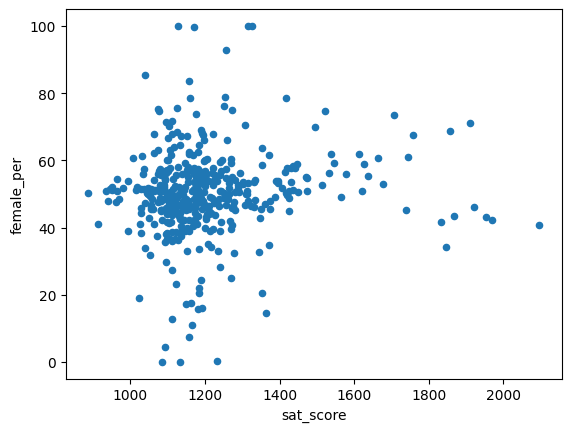

In [18]:
combined.plot.scatter(x="sat_score", y="female_per")

In [19]:
female_gt_50_sat_gt_1750 = combined.query("female_per > 50 and sat_score > 1750").sort_values("sat_score")
female_gt_50_sat_gt_1750[["DBN", "sat_score", "female_per", "white_per", "asian_per"]]

,DBN,sat_score,female_per,white_per,asian_per
30,02M416,1758.0,67.5,63.7,17.2
8,01M696,1856.0,68.7,49.8,15.1
346,25Q525,1910.0,71.1,24.6,55.5


In [20]:
female_gt_50_sat_gt_1750 = female_gt_50_sat_gt_1750.merge(hs_df[["DBN", "school_name"]], how="left", on="DBN")
female_gt_50_sat_gt_1750[["DBN", "sat_score", "female_per", "white_per", "asian_per", "school_name"]]

,DBN,sat_score,female_per,white_per,asian_per,school_name
0,02M416,1758.0,67.5,63.7,17.2,Eleanor Roosevelt High School
1,01M696,1856.0,68.7,49.8,15.1,Bard High School Early College
2,25Q525,1910.0,71.1,24.6,55.5,Townsend Harris High School


In [21]:
extra_info = [
    "Eleanor Roosevelt High School (ELRO for short) has a motivated student body, a traditional college-prep curriculum and an excellent record of college admissions.",
    "Bard High School Early College (BHSEC) offers small class sizes, excellent teaching, and the promise of two years of college credit for free. The demanding, fast-paced curriculum has attracted some of the city's best students.",
    "One of the most sought-after schools in the city, Townsend Harris High School combines rigorous academics with a well-rounded high school experience. Though known for its strength in the humanities, math and science instruction at Townsend Harris is also top-notch.",
]
female_gt_50_sat_gt_1750["extra_info"] = extra_info

These are among the very top schools in NYC, with tough curriculae. They seem to not focus on the sciences, though, so maybe this makes them more attractive to female students.

In [22]:
female_gt_95 = combined.query("female_per > 95")
female_gt_95 = female_gt_95.merge(hs_df[["DBN", "school_name"]], how="left", on="DBN")
female_gt_95[["DBN", "sat_score", "female_per", "white_per", "asian_per", "school_name"]]

,DBN,sat_score,female_per,white_per,asian_per,school_name
0,02M316,1127.0,100.0,1.3,3.4,Urban Assembly School of Business for Young Wo...
1,04M610,1326.0,100.0,1.6,5.1,Young Women's Leadership School
2,08X282,1171.0,99.7,2.4,2.9,Women's Academy of Excellence
3,28Q896,1316.0,100.0,2.4,21.0,"Young Women's Leadership School, Queens"


These are schools who admit only female students. But they have problems of their own, or cater to disadvantaged students:

* 02M316: Enrollment grew when the school moved to Wall Street in 2009, but it has fallen by almost half in recent years. Attendance is poor. More than half the students miss at least a month of school. Concerns about bullying and safety show up on the NYC School Survey.
* 04M610: The Young Women's Leadership School (TYWLS) in East Harlem is a safe and cheery school, where students get a lot of support from teachers and top-notch college counseling. Opened in 1996, TYWLS is the flagship program of the Young Women's Leadership Network, a system of all-girls public schools that aims to give students from poor neighborhoods a high quality education.
* 08X282: Teachers say the tone is safe and orderly. Attendance is poor however. Almost two thirds of the students miss a month or more of school. The school has an ethnically diverse student population. Roughly a quarter of the girls are still learning to speak English. They come from home countries that include Mexico, Central America, Pakistan, India and West Africa.
* 28Q896: One of a network of small, all-girls public schools, the Young Women’s Leadership School, Queens is a welcoming place that emphasizes academics and college-readiness and also works to help girls develop emotionally and socially.

In the U.S., high school students take Advanced Placement (AP) exams to earn college credit. There are AP exams for many different subjects.

It makes sense that the fraction of students at a school who took AP exams would be highly correlated with the school's SAT scores. Let us explore this hunch.

**Note**: Only 230 of 411 rows in `combined` have values for "ap_test_takers".

<Axes: xlabel='sat_score', ylabel='ap_per'>

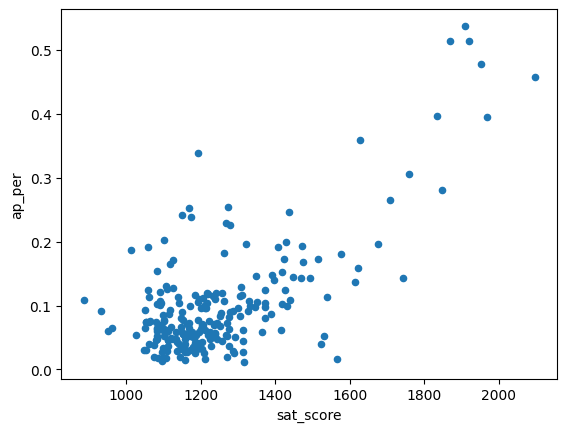

In [23]:
combined["ap_per"] = combined["ap_test_takers"] / combined["total_enrollment"]
combined.plot.scatter(x="sat_score", y="ap_per")

Next, let us determine the best school (in terms of "sat_score") in each district.

In [24]:
best_per_district = combined.sort_values(["school_dist", "sat_score"], ascending=False).groupby("school_dist").head(1)
best_per_district = best_per_district.merge(hs_df[["DBN", "school_name"]], how="left", on="DBN")
best_per_district

,DBN,sat_num_takers,sat_crit_reading,sat_math,sat_writing,sat_score,class_size,asian_per,black_per,hispanic_per,...,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,school_dist,ap_per,school_name
0,32K554,39.0,428.0,465.0,422.0,1315.0,17.793750,5.3,12.9,79.5,...,7.1,8.4,8.9,9.3,8.1,8.7,9.1,32,0.026616,All City Leadership Secondary School
1,31R605,227.0,635.0,682.0,636.0,1953.0,29.588235,31.8,1.1,5.3,...,7.4,7.8,8.5,8.6,7.8,8.1,8.6,31,0.478261,Staten Island Technical High School
2,30Q580,61.0,524.0,568.0,544.0,1636.0,20.469231,34.8,3.2,24.3,...,7.1,7.4,8.4,8.3,6.8,7.0,7.9,30,NaN,Baccalaureate School for Global Education
3,29Q272,59.0,436.0,427.0,424.0,1287.0,28.268750,9.3,73.8,14.1,...,5.5,6.2,7.1,7.0,6.8,7.1,7.6,29,0.029536,George Washington Carver High School for the S...
4,28Q687,121.0,612.0,660.0,596.0,1868.0,26.006667,74.4,10.5,7.9,...,6.5,6.8,7.9,7.7,6.9,7.1,7.9,28,0.514354,Queens High School for the Sciences at York Co...
5,27Q323,89.0,499.0,537.0,496.0,1532.0,25.938462,22.0,19.2,15.9,...,7.3,7.8,8.3,8.3,7.7,7.8,8.5,27,0.051789,Scholars' Academy
6,26Q415,888.0,480.0,545.0,489.0,1514.0,31.105263,45.7,18.4,18.6,...,5.5,6.3,7.0,7.0,6.3,6.9,7.3,26,0.172802,Benjamin N. Cardozo High School
7,25Q525,278.0,621.0,651.0,638.0,1910.0,29.362500,55.5,5.9,12.9,...,6.0,7.1,8.1,8.2,6.7,7.2,8.0,25,0.537719,Townsend Harris High School
8,24Q299,155.0,545.0,568.0,550.0,1663.0,20.471429,32.0,16.2,21.2,...,6.8,7.4,8.4,8.5,7.0,7.5,8.4,24,NaN,Bard High School Early College Queens
9,23K697,69.0,392.0,416.0,388.0,1196.0,25.106250,0.7,84.8,13.1,...,6.3,7.0,7.8,7.1,6.6,6.9,7.7,23,0.058304,Teachers Preparatory High School


In [25]:
school_name = best_per_district["school_name"].fillna("<unknown>")
best_per_district["dist_and_name"] = best_per_district["DBN"].str[:2] + ": " + school_name

<Axes: ylabel='dist_and_name'>

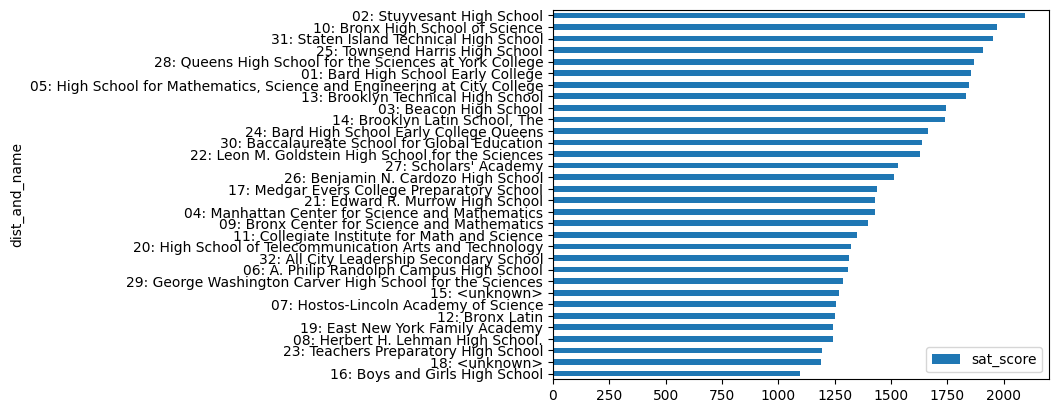

In [26]:
best_per_district.sort_values("sat_score").plot.barh(x="dist_and_name", y="sat_score")

Finally, let us do some `seaborn` plots where more than 2 dimensions are related.

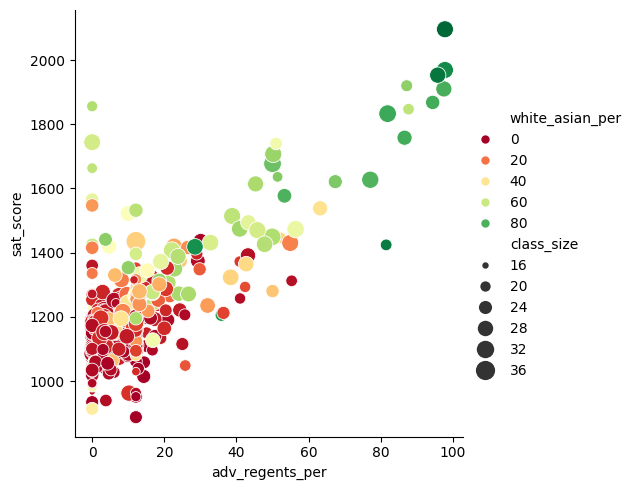

In [28]:
combined["white_asian_per"] = combined["white_per"] + combined["asian_per"]
sns.relplot(
    data=combined, x="adv_regents_per", y="sat_score",
    hue='white_asian_per', palette='RdYlGn',
    size='class_size', sizes=(1,200)
)
plt.show()